# MTH5001 Introduction to Computer Programming - Lecture 10
Module organisers Dr Lucas Lacasa and Prof. Thomas Prellberg

Last week we introduced Python [Pandas](https://pandas.pydata.org/), whose [DataFrame](http://pandas.pydata.org/pandas-docs/stable/reference/frame.html) provides an easy way to deal with spreadsheets within Python. This lecture provides further applications of Pandas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web

import warnings
warnings.filterwarnings("ignore")

## Pandas continued

### Analysing currency exchange data

Recall that DataFrames are like numpy arrays, with row and column labels that allow us to extract data by using their label. Last week we used currency data from the Federal Reserve Bank of St. Louis. When loading the USDGBP exchange rates again using the module `pandas_datareader`, we notice that we have one more week of data available than last week. The default timeframe is five years, so if we want another starting date, we need to change it by hand, using `start=datetime(year,month,day)`.

            DEXUSUK
DATE               
1990-01-01      NaN
1990-01-02   1.6110
1990-01-03   1.6100
1990-01-04   1.6293
1990-01-05   1.6370

            DEXUSUK
DATE               
2021-03-01   1.3938
2021-03-02   1.3962
2021-03-03   1.3978
2021-03-04   1.3999
2021-03-05   1.3817


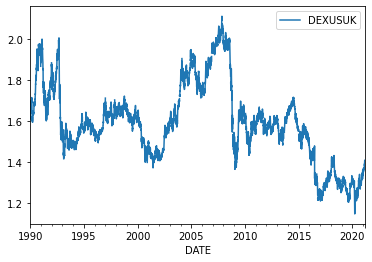

In [2]:
import pandas_datareader.data as web
from datetime import datetime
currency_rates=web.DataReader('DEXUSUK', 'fred',start=datetime(1990,1,1))
print(currency_rates.head())
print()
print(currency_rates.tail())
currency_rates.plot()
plt.show()

Lets load the USDEUR and the JPYUSD exchange rate as well, but restrict to the last 10 years only.

            DEXUSEU  DEXUSUK  DEXJPUS
DATE                                 
2010-01-01      NaN      NaN      NaN
2010-01-04   1.4419   1.6109    92.55
2010-01-05   1.4402   1.6009    91.48
2010-01-06   1.4404   1.6016    92.53
2010-01-07   1.4314   1.5912    93.31

            DEXUSEU  DEXUSUK  DEXJPUS
DATE                                 
2021-03-01   1.2054   1.3938   106.68
2021-03-02   1.2079   1.3962   106.75
2021-03-03   1.2073   1.3978   106.92
2021-03-04   1.2045   1.3999   107.58
2021-03-05   1.1914   1.3817   108.24


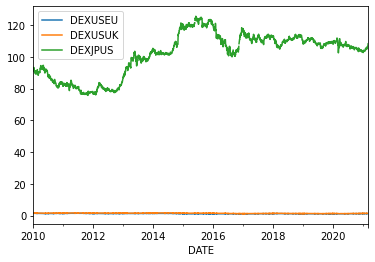

In [3]:
currency_rates=web.DataReader(['DEXUSEU','DEXUSUK','DEXJPUS'], 'fred',start=datetime(2010,1,1))
print(currency_rates.head())
print()
print(currency_rates.tail())
currency_rates.plot()
plt.show()

You see that the Yen exchange rate needs to be rescaled to provide meaningful plots.

In [4]:
currency_rates['DEXJPUS100']=0.01*currency_rates['DEXJPUS']
print(currency_rates.head())
print()
print(currency_rates.tail())

            DEXUSEU  DEXUSUK  DEXJPUS  DEXJPUS100
DATE                                             
2010-01-01      NaN      NaN      NaN         NaN
2010-01-04   1.4419   1.6109    92.55      0.9255
2010-01-05   1.4402   1.6009    91.48      0.9148
2010-01-06   1.4404   1.6016    92.53      0.9253
2010-01-07   1.4314   1.5912    93.31      0.9331

            DEXUSEU  DEXUSUK  DEXJPUS  DEXJPUS100
DATE                                             
2021-03-01   1.2054   1.3938   106.68      1.0668
2021-03-02   1.2079   1.3962   106.75      1.0675
2021-03-03   1.2073   1.3978   106.92      1.0692
2021-03-04   1.2045   1.3999   107.58      1.0758
2021-03-05   1.1914   1.3817   108.24      1.0824


Lets remove the column we don't want anymore.

            DEXUSEU  DEXUSUK  DEXJPUS100
DATE                                    
2010-01-01      NaN      NaN         NaN
2010-01-04   1.4419   1.6109      0.9255
2010-01-05   1.4402   1.6009      0.9148
2010-01-06   1.4404   1.6016      0.9253
2010-01-07   1.4314   1.5912      0.9331

            DEXUSEU  DEXUSUK  DEXJPUS100
DATE                                    
2021-03-01   1.2054   1.3938      1.0668
2021-03-02   1.2079   1.3962      1.0675
2021-03-03   1.2073   1.3978      1.0692
2021-03-04   1.2045   1.3999      1.0758
2021-03-05   1.1914   1.3817      1.0824


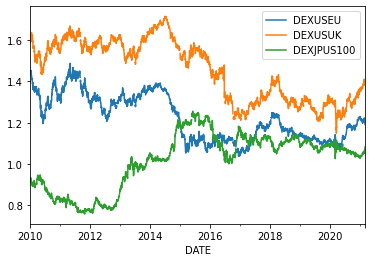

In [5]:
currency_rates=currency_rates.drop(columns='DEXJPUS')
print(currency_rates.head())
print()
print(currency_rates.tail())
currency_rates.plot()
plt.show()

As we may be most interested in GBP, lets convert to GBP-based exchange rates.

                UKUS      UKEU   UKJP100
DATE                                    
2010-01-01       NaN       NaN       NaN
2010-01-04  0.620771  0.895090  0.670741
2010-01-05  0.624649  0.899619  0.682825
2010-01-06  0.624376  0.899351  0.674782
2010-01-07  0.628457  0.899573  0.673515

                UKUS      UKEU   UKJP100
DATE                                    
2021-03-01  0.717463  0.864830  0.672538
2021-03-02  0.716230  0.865134  0.670941
2021-03-03  0.715410  0.863714  0.669108
2021-03-04  0.714337  0.860419  0.664005
2021-03-05  0.723746  0.862271  0.668649


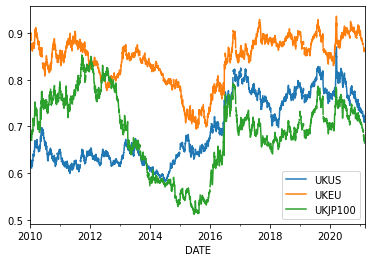

In [6]:
currency_rates['UKUS']=1/currency_rates['DEXUSUK']
currency_rates['UKEU']=currency_rates['UKUS']*currency_rates['DEXUSEU']
currency_rates['UKJP100']=currency_rates['UKUS']/currency_rates['DEXJPUS100']
currency_rates=currency_rates.drop(columns=['DEXJPUS100','DEXUSEU','DEXUSUK'])
print(currency_rates.head())
print()
print(currency_rates.tail())
currency_rates.plot()
plt.show()

### Currency returns

There are some trends visible, but things become more interesting if we look at a different quantity. Lets define *raw currency returns* as the relative gain $(S_t-S_{t-1})/S_{t-1}$. This is built into dataframes as `.pct_change()`.

                UKUS      UKEU   UKJP100
DATE                                    
2010-01-01       NaN       NaN       NaN
2010-01-04       NaN       NaN       NaN
2010-01-05  0.006246  0.005060  0.018016
2010-01-06 -0.000437 -0.000298 -0.011780
2010-01-07  0.006536  0.000247 -0.001878

                UKUS      UKEU   UKJP100
DATE                                    
2021-03-01  0.000646 -0.002581  0.000271
2021-03-02 -0.001719  0.000351 -0.002374
2021-03-03 -0.001145 -0.001641 -0.002733
2021-03-04 -0.001500 -0.003816 -0.007626
2021-03-05  0.013172  0.002153  0.006994


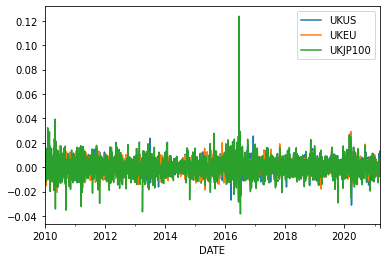

In [7]:
currency_returns=currency_rates.pct_change()
print(currency_returns.head())
print()
print(currency_returns.tail())
currency_returns.plot()
plt.show()

We easily see that there is an anomaly in the data around June 2016. We can easily zoom in on the relevant date range and draw our conclusions as to the effect of June 23rd, 2016, the day of the Brexit referendum.

In [8]:
print(currency_returns.loc['2016-6-22':'2016-6-29'])

                UKUS      UKEU   UKJP100
DATE                                    
2016-06-22 -0.000954  0.001175 -0.000954
2016-06-23 -0.007973 -0.000326 -0.020526
2016-06-24  0.085124  0.061557  0.123749
2016-06-27  0.031929  0.022468  0.038019
2016-06-28 -0.005792 -0.003087 -0.015956
2016-06-29 -0.015988 -0.010380 -0.015701


So how are the currency returns correlated? We can easily find out.

In [9]:
print(currency_returns.corr())

             UKUS      UKEU   UKJP100
UKUS     1.000000  0.512079  0.657922
UKEU     0.512079  1.000000  0.512467
UKJP100  0.657922  0.512467  1.000000


We see that the strongest correlation is between the GBPUSD and the GBPEUR returns. (Remember that a number close to $\pm1$ implies a strong correlation, and a number close to $0$ means that there is no correlation.)

To get better insight into this, we can also produce a visual representation of the same data.

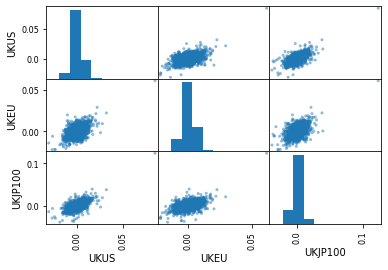

In [10]:
pd.plotting.scatter_matrix(currency_returns);
plt.show()

On the diagonal, the plots show the distribution of the three currency returns. The off-diagonal plots are scatter plots of the values of the respective currency returns. The outlier does distort the plot, so lets drop the data of June 24, 2016.

             UKUS      UKEU   UKJP100
UKUS     1.000000  0.480570  0.625305
UKEU     0.480570  1.000000  0.478428
UKJP100  0.625305  0.478428  1.000000


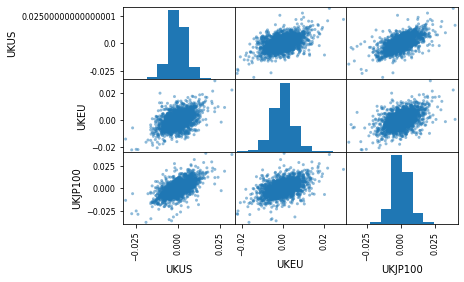

In [11]:
currency_returns_before=currency_returns.loc[:'2016-6-23']
currency_returns_after=currency_returns.loc['2016-6-27':]
currency_returns_cleaned=currency_returns_before.append(currency_returns_after)
print(currency_returns_cleaned.corr())
pd.plotting.scatter_matrix(currency_returns_cleaned);
plt.show()

Removing the outlier seems to have been sensible. But is there a change before and after the date?

In [12]:
print(currency_returns.loc[:'2016-6-23'].corr())
print()
print(currency_returns.loc['2016-6-28':].corr())

             UKUS      UKEU   UKJP100
UKUS     1.000000  0.298909  0.575575
UKEU     0.298909  1.000000  0.342593
UKJP100  0.575575  0.342593  1.000000

             UKUS      UKEU   UKJP100
UKUS     1.000000  0.702265  0.690807
UKEU     0.702265  1.000000  0.679502
UKJP100  0.690807  0.679502  1.000000


It seems that there is a change in the correlation matrix.

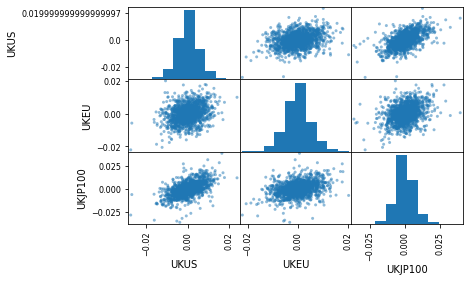

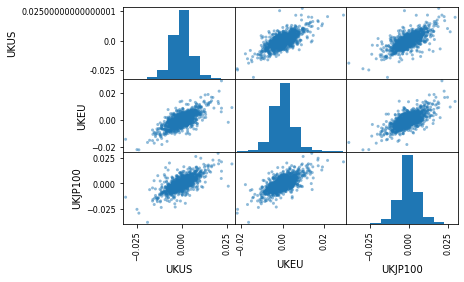

In [13]:
pd.plotting.scatter_matrix(currency_returns.loc[:'2016-6-23']);
plt.show()
print()
pd.plotting.scatter_matrix(currency_returns.loc['2016-6-28':]);
plt.show()

Is it significant? I am not a financial analyst, and I shall leave it up to you to come to your own conclusions.

### Seaborn Statistical Plots

I prefer to show you now a nice set of tools to provide an even nicer graphical representation of the data. The [Seaborn](http://seaborn.pydata.org/) library provides a high-level interface for drawing very attractive statistical graphics.

In [14]:
import seaborn as sns

As an example, lets focus on the GBPUSD and the GBPEUR exchange currency returns after June 23, 2016.

In [15]:
data=currency_returns[['UKUS','UKEU']].loc['2016-6-27':]
print(data.head())
print()
print(data.tail())

                UKUS      UKEU
DATE                          
2016-06-27  0.031929  0.022468
2016-06-28 -0.005792 -0.003087
2016-06-29 -0.015988 -0.010380
2016-06-30  0.020239  0.012438
2016-07-01 -0.002937  0.007276

                UKUS      UKEU
DATE                          
2021-03-01  0.000646 -0.002581
2021-03-02 -0.001719  0.000351
2021-03-03 -0.001145 -0.001641
2021-03-04 -0.001500 -0.003816
2021-03-05  0.013172  0.002153


Matplotlib of course offers histogram plotting:


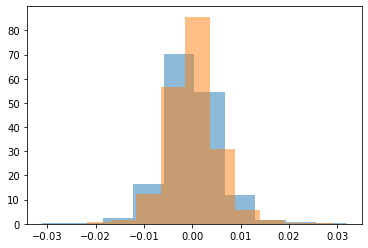

In [16]:
plt.hist(data['UKUS'], density=True, alpha=0.5)
plt.hist(data['UKEU'], density=True, alpha=0.5)
plt.show()

But lets compare this to seaborn output, which produces a smooth estimate of the distribution, using a kernel density estimation (KDE).

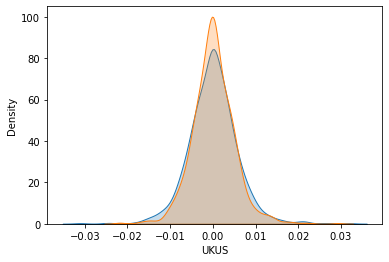

In [17]:
sns.kdeplot(data['UKUS'], shade=True)
sns.kdeplot(data['UKEU'], shade=True)
plt.show()

Histogram and KDE can be shown together.

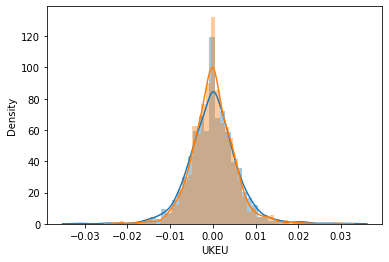

In [18]:
sns.distplot(data['UKUS'])
sns.distplot(data['UKEU'])
plt.show()

So what about the full two-dimensional data set? We have already encountered scatter plots from dataframes.

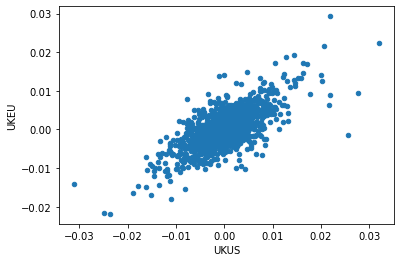

In [19]:
data.plot.scatter('UKUS','UKEU')
plt.show()

Seaborn produces contour plots of the joint density that are perhaps more informative.

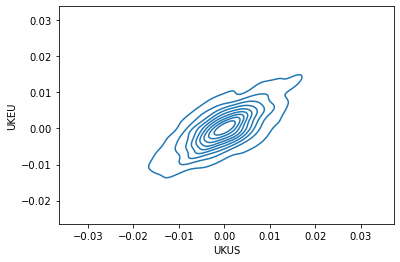

In [20]:
sns.kdeplot(data['UKUS'],data['UKEU'])
plt.show()

This can be combined with a plot of the individual (marginal) distributions.

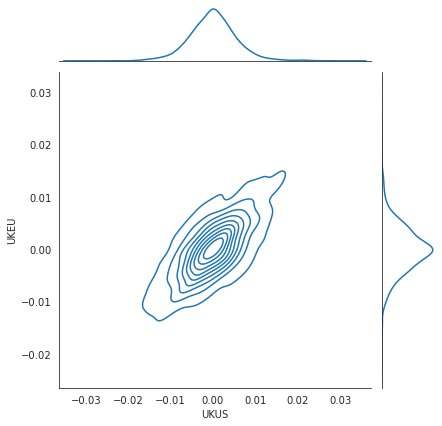

In [21]:
with sns.axes_style('white'):
    sns.jointplot("UKUS", "UKEU", data, kind='kde');

And again, there are different options.

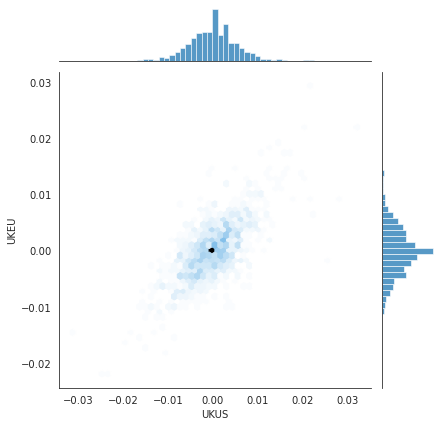

In [22]:
with sns.axes_style('white'):
    sns.jointplot("UKUS", "UKEU", data, kind='hex')

Lets try some linear regression out of the box.

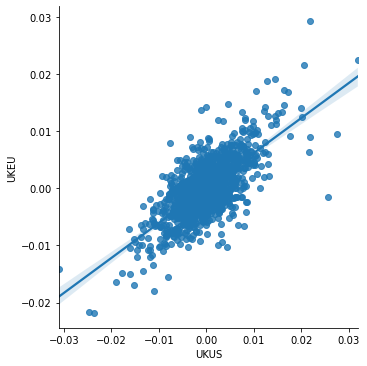

In [23]:
sns.lmplot(x="UKUS", y="UKEU", data=data);

So, are these two currency returns correlated? And did the Brexit referendum have any effect on this except for a two-day disruption? Lets add a flag to the data we have to distinguish between before and after Brexit.

In [24]:
currency_returns_before['flag']='before'
currency_returns_after['flag']='after'
currency_returns_cleaned=currency_returns_before.append(currency_returns_after)

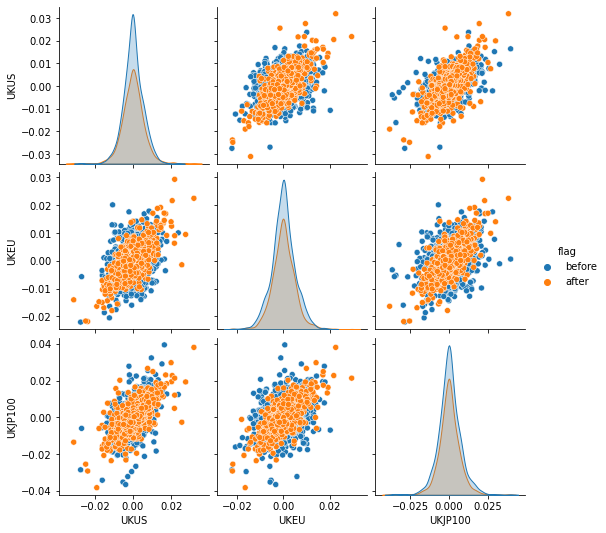

In [25]:
sns.pairplot(data=currency_returns_cleaned,hue='flag');

However, I'm just here to teach you Python. I'll leave any conclusions from the data analysis to you.

## Conclusion and Outlook

In this lecture we continued the use of DataFrames, and described how to do some statistical analyses and plots with seaborn.